In [1]:
import torch
import torchvision.datasets as datasets
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader
from torchvision.transforms import transforms


In [2]:
#Parameters
epochs = 50
lr = 0.002
batch_size = 64

In [4]:
Transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5,), (0.5,))])

In [5]:
# data loader
mnist_trainset = datasets.MNIST(root='./mnist', train=True, download=True, transform=Transform)
mnist_testset = datasets.MNIST(root='./mnist', train=False, download=True, transform=Transform)
train_loader = DataLoader(mnist_trainset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(mnist_testset, batch_size=batch_size, shuffle=False)

In [6]:
# Model Architecture with 2 hidden layers
class MLP(nn.Module): 
    def __init__(self):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(784, 128)  
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(128, 256)
        self.relu2 = nn.ReLU()
        self.fc3 = nn.Linear(256, 128)
        self.relu3 = nn.ReLU()
        self.fc4 = nn.Linear(128, 10)
        self.softmax = nn.Softmax(dim=1)

    def forward(self, x):
        x = x.view(-1, 784)
        x = self.fc1(x)
        x = self.relu1(x)
        x = self.fc2(x)
        x = self.relu2(x)
        x = self.fc3(x)
        x = self.relu3(x)
        out = self.fc4(x)
        out = self.softmax(out)
        return out


In [7]:
t = torch.rand(1, 1, 28, 28)
model = MLP()
out = model(t)

In [8]:
# Training
model = MLP()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=lr)
loss_list = []
acc_list = []
for epoch in range(epochs):
    loss_sum = 0
    for i, (images, labels) in enumerate(train_loader):
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        loss_sum += loss.item()
        epoch_loss = loss_sum/len(train_loader)
    loss_list.append(epoch_loss)
    print('Epoch: {}  Loss: {:.6f}'.format(epoch+1, loss_sum/len(train_loader)))

    # Testing
    correct = 0
    total = 0
    for images, labels in test_loader:
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted==labels).sum().item()
    acc = correct/total
    acc_list.append(acc)

    print('Test Accuracy: {:.4f} %'.format(100*correct/total))

Epoch: 1  Loss: 1.738081
Test Accuracy: 81.1000 %
Epoch: 2  Loss: 1.655752
Test Accuracy: 79.3500 %
Epoch: 3  Loss: 1.638808
Test Accuracy: 87.2400 %
Epoch: 4  Loss: 1.583031
Test Accuracy: 89.2000 %
Epoch: 5  Loss: 1.566024
Test Accuracy: 92.4300 %
Epoch: 6  Loss: 1.572092
Test Accuracy: 89.3300 %
Epoch: 7  Loss: 1.576125
Test Accuracy: 90.7600 %
Epoch: 8  Loss: 1.566304
Test Accuracy: 92.2000 %
Epoch: 9  Loss: 1.564720
Test Accuracy: 91.1800 %
Epoch: 10  Loss: 1.572283
Test Accuracy: 91.3700 %
Epoch: 11  Loss: 1.585221
Test Accuracy: 90.1700 %
Epoch: 12  Loss: 1.596045
Test Accuracy: 89.8800 %
Epoch: 13  Loss: 1.573238
Test Accuracy: 92.2800 %
Epoch: 14  Loss: 1.574133
Test Accuracy: 87.9900 %
Epoch: 15  Loss: 1.586111
Test Accuracy: 81.2800 %
Epoch: 16  Loss: 1.597158
Test Accuracy: 78.2500 %
Epoch: 17  Loss: 1.582580
Test Accuracy: 88.7600 %
Epoch: 18  Loss: 1.592565
Test Accuracy: 91.1700 %
Epoch: 19  Loss: 1.619128
Test Accuracy: 88.3100 %
Epoch: 20  Loss: 1.605582
Test Accuracy:

In [33]:
image, label = mnist_trainset[1000]

(<matplotlib.image.AxesImage at 0x29a1e6d50>, 0)

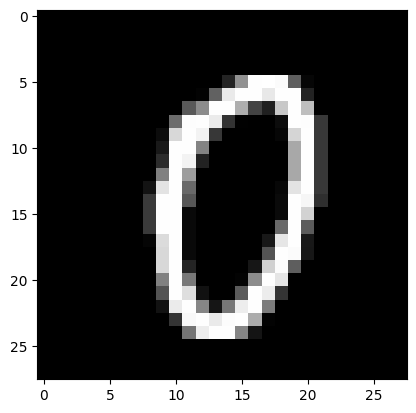

In [34]:
plt.imshow(image.squeeze(), cmap='gray'), label


In [35]:
outputs = model(image.unsqueeze(0))
_, predicted = torch.max(outputs.data, 1)
predicted.item()

0

In [36]:
outputs

tensor([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], grad_fn=<SoftmaxBackward0>)